# Cindy Vanessa Aguirre Marín
# Trabajo de grado

# **3. Modelo**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_uno = pd.read_excel("/content/drive/MyDrive/Proyecto_grado/Datos/Datos.xlsx")


In [ ]:
# Guardar el DataFrame en formato pickle
df_uno.to_pickle("/content/drive/MyDrive/Proyecto_grado/Datos/Datos.pkl")

In [ ]:
pip install umap-learn

In [ ]:
pip install umap-learn[plot]

In [ ]:
import sklearn.datasets
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import pandas as pd
import numpy as np
import umap
import umap.plot

# Reducción de dimensionalidad

In [ ]:
cluster1 = umap.UMAP(n_neighbors=15, random_state=42).fit(df_uno)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

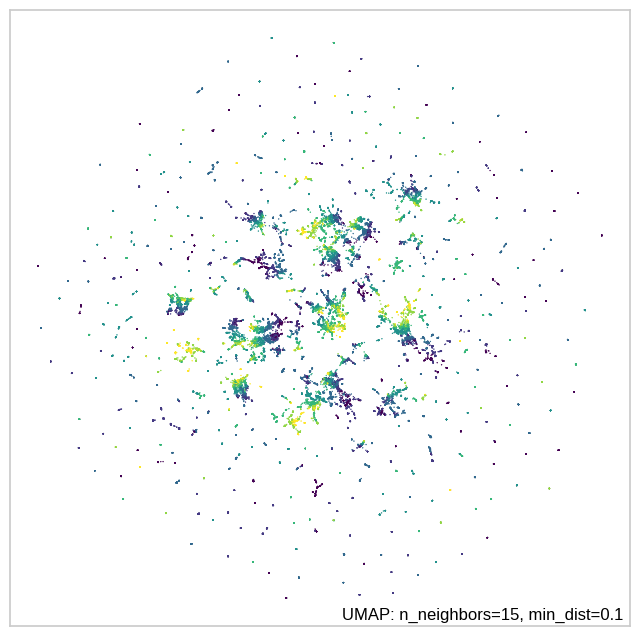

In [ ]:
umap.plot.points(cluster1, values=df_uno["RangoEdad_"], cmap="viridis")

In [ ]:
umap = umap.UMAP(n_components=2, random_state=42, metric= 'manhattan')
X_reduced = umap.fit_transform(df_uno)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# K-Means

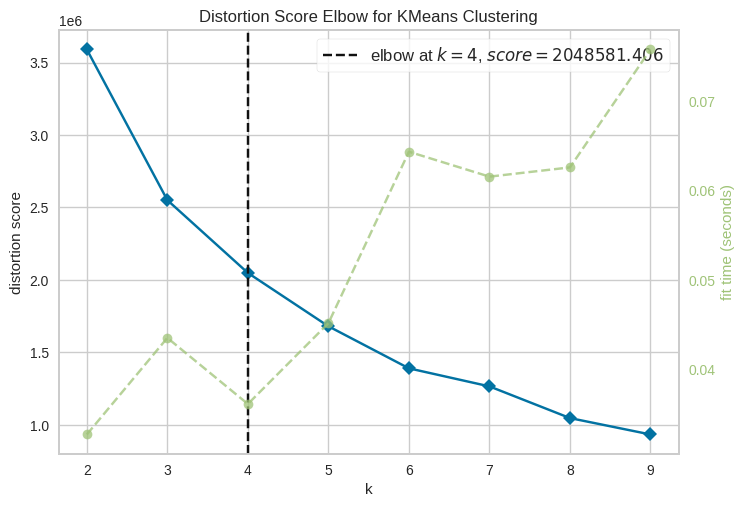

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instancia el modelo de clustering y visualizador
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2, 10))

# Ajusta los datos al visualizador
visualizer.fit(X_reduced)

# Muestra el gráfico
visualizer.show()

In [ ]:
 #Se crea el cluster
km = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=100,
    random_state=42
)

clusters_predict = km.fit_predict(X_reduced)


In [ ]:
# Convertir clusters_predict a una Serie de pandas
clusters_predict_series = pd.Series(clusters_predict, name='Cluster')

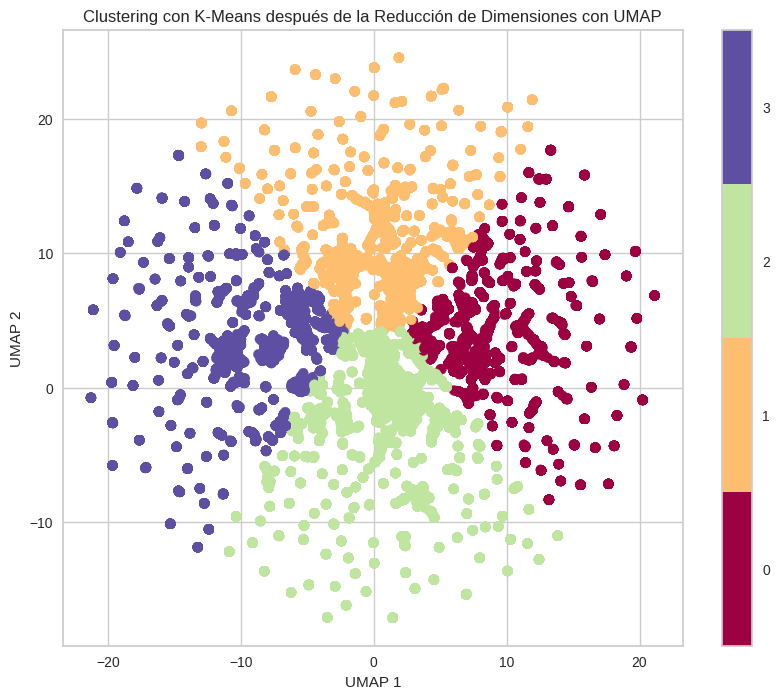

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters_predict, cmap='Spectral', s=50)
plt.colorbar(boundaries=np.arange(len(set(clusters_predict)) + 1) - 0.5).set_ticks(np.arange(len(set(clusters_predict))))
plt.title('Clustering con K-Means después de la Reducción de Dimensiones con UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

# Evaluación

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
print(f"Davies bouldin score: {davies_bouldin_score(X_reduced,clusters_predict)}")
print(f"Calinski Score: {calinski_harabasz_score(X_reduced,clusters_predict)}")
print(f"Silhouette Score: {silhouette_score(X_reduced,clusters_predict)}")

Davies bouldin score: 0.9328117340508842
Calinski Score: 29734.127213320895
Silhouette Score: 0.32718053460121155


In [ ]:
print(f"Davies bouldin score: {davies_bouldin_score(X_reduced,clusters_predict)}")

Davies bouldin score: 0.9328117340508842


# Interpretación de las características

In [ ]:
!pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.7/651.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013921 sha256=e1f7cc2973246388a80d537ee820734f0aea62b9fcc9e87294057677d1d611f7
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46a

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier
from shapash import SmartExplainer


In [ ]:
# Entrenar el modelo LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(df_uno, clusters_predict_series)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 34
[LightGBM] [Info] Start training from score -1.536931
[LightGBM] [Info] Start training from score -1.383977
[LightGBM] [Info] Start training from score -1.208851
[LightGBM] [Info] Start training from score -1.444602


LGBMClassifier(random_state=42)

In [ ]:
# Agrupación de características
features_groups = {
    "Mes": ["Mes__Agosto", "Mes__Diciembre", "Mes__Enero", "Mes__Febrero", "Mes__Julio",
            "Mes__Junio", "Mes__Marzo", "Mes__Mayo", "Mes__Noviembre", "Mes__Octubre",
            "Mes__Septiembre"],
    "RegionOrigen": ["RegionOrigen__AméricaCentralyelCaribe", "RegionOrigen__AméricadelNorte",
                     "RegionOrigen__AméricadelSur", "RegionOrigen__Asia", "RegionOrigen__Europa",
                     "RegionOrigen__Oceanía", "RegionOrigen__Otros"],
    "MotivoViaje": ["MotivoViaje__Casosespecíficosyotros", "MotivoViaje__EstudiosyPrácticas",
                    "MotivoViaje__EventosyConferencias", "MotivoViaje__FamiliayRelacionesMaritales",
                    "MotivoViaje__NegociosyTrabajo", "MotivoViaje__ProtecciónySituacionesEspeciales",
                    "MotivoViaje__SaludyTratamientoMédico", "MotivoViaje__TránsitoyMovilidad",
                    "MotivoViaje__TurismoyViajes"],
    "RegionHospedaje": ["RegionHospedaje__RegiónAmazónica", "RegionHospedaje__RegiónAndina",
                        "RegionHospedaje__RegiónCaribe", "RegionHospedaje__RegiónOrinoquía",
                        "RegionHospedaje__RegiónPacífica"],
    "Transporte": ["Transporte__Otros", "Transporte__Terrestre"]
}

# Etiquetas de los grupos de características
groups_labels = {
    'Mes': 'Mes de viaje',
    'RegionOrigen': 'Región de origen',
    'MotivoViaje': 'Motivo del viaje',
    'RegionHospedaje': 'Región de hospedaje',
    'Transporte': 'Medio de transporte'
}

In [ ]:
# Crear un SmartExplainer de Shapash
xpl = SmartExplainer(model=model, features_groups=features_groups, features_dict=groups_labels)
xpl.compile(x=df_uno, y_pred=clusters_predict_series)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7e080e4bde40>


## Cluster 3

In [ ]:
# Mostrar la importancia de las características
xpl.plot.features_importance()

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='MotivoViaje')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='Mes')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='RegionOrigen')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='RegionHospedaje')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='Transporte')

In [ ]:
# Crear un DataFrame con las etiquetas de los clusters
df_clusters = pd.DataFrame(X_reduced, columns=['Component1', 'Component2'])  # Ajusta los nombres de las columnas según corresponda
df_clusters['Cluster'] = clusters_predict

# Mostrar las observaciones de cada cluster
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(df_clusters[df_clusters['Cluster'] == cluster_num])
    print("\n")

Cluster 0:
       Component1  Component2  Cluster
6       12.511570   13.762691        0
7        9.926367    5.472273        0
10       7.852721   11.176318        0
14       6.452404   -0.315671        0
16      12.511605   13.762753        0
...           ...         ...      ...
49961    3.835269    3.018259        0
49975   13.941009    4.898817        0
49981   12.467244    7.315306        0
49982    5.336728    6.111658        0
49987    8.267038    6.742013        0

[10752 rows x 3 columns]


Cluster 1:
       Component1  Component2  Cluster
1        5.224977   22.213394        1
19      -7.135254   12.841970        1
20       2.376073    8.544271        1
22       1.212343   11.632970        1
31       0.488932    6.045846        1
...           ...         ...      ...
49979    0.687983    5.677123        1
49988   -2.164070    5.697080        1
49991    1.212111   11.646050        1
49992    7.713995   15.822710        1
49997   -0.434432   16.143492        1

[12529 rows x

# Cluster cero nombrado como 3

In [ ]:
# Ajustar el modelo KMeans
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=100,
            random_state=42)

clusters_predict = km.fit_predict(X_reduced)

# Crear un DataFrame con las etiquetas de los clusters
df_clusters = pd.DataFrame(X_reduced, columns=['Component1', 'Component2'])  # Ajusta los nombres de las columnas según corresponda
df_clusters['Cluster'] = clusters_predict

# Renombrar los clusters
df_clusters['Cluster'] = df_clusters['Cluster'].replace({0: 3, 1: 0, 2: 1, 3: 2})

# Mostrar las observaciones de cada cluster con las nuevas etiquetas
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(df_clusters[df_clusters['Cluster'] == cluster_num])
    print("\n")

Cluster 0:
       Component1  Component2  Cluster
1        5.224977   22.213394        0
19      -7.135254   12.841970        0
20       2.376073    8.544271        0
22       1.212343   11.632970        0
31       0.488932    6.045846        0
...           ...         ...      ...
49979    0.687983    5.677123        0
49988   -2.164070    5.697080        0
49991    1.212111   11.646050        0
49992    7.713995   15.822710        0
49997   -0.434432   16.143492        0

[12529 rows x 3 columns]


Cluster 1:
       Component1  Component2  Cluster
2        5.401739    0.073766        1
3        2.454424   -0.493297        1
9        0.120695   -0.912650        1
15       2.112465   -0.147320        1
21       0.071005   -0.958228        1
...           ...         ...      ...
49983    3.310445   -1.409350        1
49986    4.862739   -2.850296        1
49993   -0.204250   -0.889055        1
49994    0.951445   -1.246987        1
49996    3.947574    1.234275        1

[14927 rows x

In [ ]:
# Convertir las etiquetas renombradas en una serie
clusters_predict_series = df_clusters['Cluster']

In [ ]:
# Entrenar el modelo LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(df_uno, clusters_predict_series)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 34
[LightGBM] [Info] Start training from score -1.383977
[LightGBM] [Info] Start training from score -1.208851
[LightGBM] [Info] Start training from score -1.444602
[LightGBM] [Info] Start training from score -1.536931


LGBMClassifier(random_state=42)

In [ ]:
# Crear un SmartExplainer de Shapash
xpl = SmartExplainer(model=model, features_groups=features_groups, features_dict=groups_labels)
xpl.compile(x=df_uno, y_pred=clusters_predict_series)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7e081d7fba30>


In [ ]:
# Mostrar la importancia de las características
xpl.plot.features_importance()

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='MotivoViaje')

In [ ]:
# Mostrar la importancia de las características del grupo "Mes"
xpl.plot.features_importance(group_name='Mes')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='RegionOrigen')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='RegionHospedaje')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='Transporte')

In [ ]:
# Consultar cuántos valores tiene cada cluster
cluster_counts = df_clusters['Cluster'].value_counts()

# Mostrar los resultados
print(cluster_counts)

Cluster
1    14927
0    12529
2    11792
3    10752
Name: count, dtype: int64


# Cluser 1 nombrado como 3

In [ ]:
# Ajustar el modelo KMeans
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=100,
            random_state=42)

clusters_predict = km.fit_predict(X_reduced)

# Crear un DataFrame con las etiquetas de los clusters
df_clusters = pd.DataFrame(X_reduced, columns=['Component1', 'Component2'])  # Ajusta los nombres de las columnas según corresponda
df_clusters['Cluster'] = clusters_predict

# Renombrar los clusters
df_clusters['Cluster'] = df_clusters['Cluster'].replace({1: 3, 2: 0, 3: 1, 0: 2})

#replace({0: 3, 1: 0, 2: 1, 3: 2})
#replace({1: 3, 2: 0, 3: 1, 0: 2})
#replace({2: 3, 3: 0, 0: 1, 1: 2})

# Mostrar las observaciones de cada cluster con las nuevas etiquetas
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(df_clusters[df_clusters['Cluster'] == cluster_num])
    print("\n")

Cluster 0:
       Component1  Component2  Cluster
2        5.401739    0.073766        0
3        2.454424   -0.493297        0
9        0.120695   -0.912650        0
15       2.112465   -0.147320        0
21       0.071005   -0.958228        0
...           ...         ...      ...
49983    3.310445   -1.409350        0
49986    4.862739   -2.850296        0
49993   -0.204250   -0.889055        0
49994    0.951445   -1.246987        0
49996    3.947574    1.234275        0

[14927 rows x 3 columns]


Cluster 1:
       Component1  Component2  Cluster
0       -9.832147    1.908437        1
4       -6.593611    5.727744        1
5       -8.214193    3.163666        1
8       -9.857970    6.054881        1
11      -5.099150   -0.181013        1
...           ...         ...      ...
49989   -9.385550   12.762519        1
49990   -8.202840    3.017769        1
49995   -3.009286    3.754771        1
49998  -13.920386    5.308617        1
49999  -18.735825    5.365563        1

[11792 rows x

In [ ]:
# Convertir las etiquetas renombradas en una serie
clusters_predict_series = df_clusters['Cluster']

In [ ]:
# Entrenar el modelo LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(df_uno, clusters_predict_series)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 34
[LightGBM] [Info] Start training from score -1.208851
[LightGBM] [Info] Start training from score -1.444602
[LightGBM] [Info] Start training from score -1.536931
[LightGBM] [Info] Start training from score -1.383977


LGBMClassifier(random_state=42)

In [ ]:
# Utilizar SHAP para la explicación
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_uno)

In [ ]:
# Crear un SmartExplainer de Shapash
xpl = SmartExplainer(model=model, features_groups=features_groups, features_dict=groups_labels)
xpl.compile(x=df_uno, y_pred=clusters_predict_series)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7e080e0d7550>


In [ ]:
# Mostrar la importancia de las características
xpl.plot.features_importance()

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='MotivoViaje')

In [ ]:
# Mostrar la importancia de las características del grupo "Mes"
xpl.plot.features_importance(group_name='Mes')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='RegionOrigen')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='RegionHospedaje')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='Transporte')

## Cluster 2 nombrado como 3

In [ ]:
# Ajustar el modelo KMeans
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=100,
            random_state=42)

clusters_predict = km.fit_predict(X_reduced)

# Crear un DataFrame con las etiquetas de los clusters
df_clusters = pd.DataFrame(X_reduced, columns=['Component1', 'Component2'])  # Ajusta los nombres de las columnas según corresponda
df_clusters['Cluster'] = clusters_predict

# Renombrar los clusters
df_clusters['Cluster'] = df_clusters['Cluster'].replace({2: 3, 3: 0, 0: 1, 1: 2})

#replace({0: 3, 1: 0, 2: 1, 3: 2})
#replace({1: 3, 2: 0, 3: 1, 0: 2})
#replace({2: 3, 3: 0, 0: 1, 1: 2})

# Mostrar las observaciones de cada cluster con las nuevas etiquetas
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(df_clusters[df_clusters['Cluster'] == cluster_num])
    print("\n")

Cluster 0:
       Component1  Component2  Cluster
0       -9.832147    1.908437        0
4       -6.593611    5.727744        0
5       -8.214193    3.163666        0
8       -9.857970    6.054881        0
11      -5.099150   -0.181013        0
...           ...         ...      ...
49989   -9.385550   12.762519        0
49990   -8.202840    3.017769        0
49995   -3.009286    3.754771        0
49998  -13.920386    5.308617        0
49999  -18.735825    5.365563        0

[11792 rows x 3 columns]


Cluster 1:
       Component1  Component2  Cluster
6       12.511570   13.762691        1
7        9.926367    5.472273        1
10       7.852721   11.176318        1
14       6.452404   -0.315671        1
16      12.511605   13.762753        1
...           ...         ...      ...
49961    3.835269    3.018259        1
49975   13.941009    4.898817        1
49981   12.467244    7.315306        1
49982    5.336728    6.111658        1
49987    8.267038    6.742013        1

[10752 rows x

In [ ]:
# Convertir las etiquetas renombradas en una serie
clusters_predict_series = df_clusters['Cluster']

In [ ]:
# Entrenar el modelo LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(df_uno, clusters_predict_series)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 34
[LightGBM] [Info] Start training from score -1.444602
[LightGBM] [Info] Start training from score -1.536931
[LightGBM] [Info] Start training from score -1.383977
[LightGBM] [Info] Start training from score -1.208851


LGBMClassifier(random_state=42)

In [ ]:
# Utilizar SHAP para la explicación
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_uno)

In [ ]:
# Crear un SmartExplainer de Shapash
xpl = SmartExplainer(model=model, features_groups=features_groups, features_dict=groups_labels)
xpl.compile(x=df_uno, y_pred=clusters_predict_series)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7e080e8f4f10>


In [ ]:
# Mostrar la importancia de las características
xpl.plot.features_importance()

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='MotivoViaje')

In [ ]:
# Mostrar la importancia de las características del grupo "Mes"
xpl.plot.features_importance(group_name='Mes')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='RegionOrigen')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='RegionHospedaje')

In [ ]:
# Mostrar la importancia de las características del grupo "MotivoViaje"
xpl.plot.features_importance(group_name='Transporte')